#**Lead Qualification Dataset(AutoML)**

The data associated with this notebok can de downloaded [here](https://drive.google.com/file/d/1AK2zWojZWFa1xZqLOQ3VRdzjX0kEDo5H/view?usp=sharing)

#**Table of Contents**
* Business  Problem
* Executive Summary (BLUF)
* READ FIRST!!
* Libraries
* Data
Preprocessing
* Auto-Skleartn
* TPOT
* Conclusions


#**Executive Summary (BLUF)**

Auto-Sklearn and TPOT are probably better than the XGBoot Classifier that we developed in the M4 notebook. Auto-Sklearn appears to have the edge over TPOT, but there's not much in it. The Auto-Sklearn pipeline has an AUC of around 0.92 and an accuracy of around 0.92.

#**READ FIRST!!**
Run the following code block. It may fail!
Then run "RESTART and RUN ALL" from the Runtime menu!!!
This is needed to get all the required versions of all packages to be correctly installed.

In [ ]:
!sudo apt-get update
!sudo apt-get install build-essential swig
!sudo apt-get upgrade
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

import autosklearn.classification

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 1s (178 kB/s)
Reading package lis

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math

In [ ]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
# scikitplot
!pip install scikit-plot
import scikitplot as skplt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Data**

In [ ]:
# Read Data
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/Marketing_Leads_India.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

# Head  tail of df
print(df.head())
print(df.tail())

Shape (9240, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                      

#**Preprocessing**

##*Resolve Missing Values*

In [ ]:
# Delete 'Lead Number' as it is an index
if 'Lead Number' in df.columns:
  df = df.drop(['Lead Number'],axis=1)

In [ ]:
# Correct NaN's in features with a small number of missing values
# Fixing NaNs in 'Lead Source'
print(df['Lead Source'].describe())
df['Lead Source'] = df['Lead Source'].replace(np.nan, 'Google')

# Fixing NaNs in 'TotalVisits'
print('\n\n',df['TotalVisits'].describe())
df['TotalVisits'] = df['TotalVisits'].replace(np.nan, 3)

# Fixing NaNs in 'Page Views Per Visit'
print('\n\n',df['Page Views Per Visit'].describe())
df['Page Views Per Visit'] = df['Page Views Per Visit'].replace(np.nan, 2)

# Fixing NaNs in 'Last Activity'
print('\n\n',df['Last Activity'].describe())
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Email Opened')

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object


 count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


 count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


 count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object


Missing Values
 Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Ti

In [ ]:
# Treat NaNs in 'City' with "No City" label
df = df.replace(np.NaN, "No City")

In [ ]:
# Delete features wih more than 50% NaNs: 'How did you hear about X Education', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', and 'Asymmetrique Profile Score' as there are too many missing values in those features
if 'How did you hear about X Education' in df.columns:
  df = df.drop(['How did you hear about X Education'],axis=1)
if 'Lead Profile' in df.columns:
  df = df.drop(['Lead Profile'],axis=1)
if 'Asymmetrique Activity Index' in df.columns:
  df = df.drop(['Asymmetrique Activity Index'],axis=1)
if 'Asymmetrique Activity Score' in df.columns:
  df = df.drop(['Asymmetrique Activity Score'],axis=1)
if 'Asymmetrique Profile Index' in df.columns:
  df = df.drop(['Asymmetrique Profile Index'],axis=1)
if 'Asymmetrique Profile Score' in df.columns:
  df = df.drop(['Asymmetrique Profile Score'],axis=1)

In [ ]:
# Consolidate rare values in selected features into "Other" category

# Lead Origin
df['Lead Origin'] = df['Lead Origin'].replace(['Quick Add Form'], 'Lead Add Form')

# Column: Lead Source
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'blog', 'youtubechannel','testone', 'welearnblog_Home','Other'], 'Other')

# Column: What is your current occupation
df['What is your current occupation'] = df['What is your current occupation'].replace(['Housewife','Businessman','Other'], 'Other')

# Column: Last Activity
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                   'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                   'Resubscribed to emails','Email Received', 'Email Marked Spam','Other'], 'Other')

#Column: Last Notable Activity
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Unsubscribed','Unreachable', 'Email Bounced', 'Unsubscribed' 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam',
                                  'Email Received', 'Form Submitted on Website', 'View in browser link Clicked',
                                  'Resubscribed to emails', 'Approached upfront','Other'], 'Other')

# Column: Tags
df['Tags'] = df['Tags'].replace(['invalid number', 'wrong number given', 'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','Other'], 'Other')



In [ ]:
# Delete columns that have one extremely dominant value
if 'Get updates on DM Content ' in df.columns:
  df = df.drop(['Get updates on DM Content'],axis=1)
if 'I agree to pay the amount through cheque' in df.columns:
  df = df.drop(['I agree to pay the amount through cheque'],axis=1)
if 'Update me on Supply Chain Content' in df.columns:
  df = df.drop(['Update me on Supply Chain Content'],axis=1)
if 'Receive More Updates About Our Courses' in df.columns:
  df = df.drop(['Receive More Updates About Our Courses'],axis=1)
if 'Do Not Call' in df.columns:
  df = df.drop(['Do Not Call'],axis=1)
if 'Newspaper' in df.columns:
  df = df.drop(['Newspaper'],axis=1)
if 'Get updates on DM Content' in df.columns:
  df = df.drop(['Get updates on DM Content'],axis=1)
if 'Newspaper Article' in df.columns:
  df = df.drop(['Newspaper Article'],axis=1)
if 'Magazine' in df.columns:
  df = df.drop(['Magazine'],axis=1)
if 'Receive More Updates About Our Courses' in df.columns:
  df = df.drop(['Receive More Updates About Our Courses'],axis=1)
if 'What matters most to you in choosing a course' in df.columns:
  df = df.drop(['What matters most to you in choosing a course'],axis=1)
if 'X Education Forum' in df.columns:
  df = df.drop(['X Education Forum'],axis=1)
if 'Search' in df.columns:
  df = df.drop(['Search'],axis=1)
if 'Through Recommendations' in df.columns:
  df = df.drop(['Through Recommendations'],axis=1)
if 'Digital Advertisement' in df.columns:
  df = df.drop(['Digital Advertisement'],axis=1)
if 'X Education Forums' in df.columns:
  df = df.drop(['X Education Forums'],axis=1)
if 'Country' in df.columns:
  df = df.drop(['Country'],axis=1)

##*Encodings*

In [ ]:
# One-Hot Encode Categorical Variables (except 'City')
df = pd.get_dummies(data=df, columns=['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],drop_first=True)


##*Outliers*

In [ ]:
# Address outliers in quant varianbles
for i in ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']:
  quantiles = df[i].quantile([0.05,0.95]).values
  print(i,quantiles,'\n\n')
  df[i][df[i] <= quantiles[0]] = quantiles[0]
  df[i][df[i] >= quantiles[1]] = quantiles[1]

TotalVisits [ 0. 10.] 


Total Time Spent on Website [   0. 1562.] 


Page Views Per Visit [0. 6.] 




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##*Set Up Predictors & Target*

In [ ]:
# Split features into X1 (quant features), X2 (qual features) and y (target)
# Identify predictors & target
X = df.drop(['Converted'], axis=1)
y = df['Converted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=54321, stratify=y)

In [ ]:
# SMOTE (oversampling)
# Data is unbalanced (38.54% converted instances)

import imblearn
print("imblearn version: ", imblearn.__version__)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12346)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

imblearn version:  0.8.1
Shape before SMOTE:  (6930, 71) (6930,) 

Shape after SMOTE:  (8518, 71) (8518,) 



In [ ]:
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_test_std = stdsc.transform(X_test)

#**Auto-Sklearn**


In [ ]:
# Create Auto-Sklearn model and report performance
# regr = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,ensemble_size=1, initial_configurations_via_metalearning=0)  #Use this instance if you want to suppress the ensemble
clf = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=-1,metric = autosklearn.metrics.roc_auc)
clf.fit(X_train_SMOTE_std, y_train_SMOTE)
# summarize
print(clf.sprint_statistics())
# evaluate best model
y_pred = clf.predict(X_test_std)
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Accuracy: {clf.score(X_test_std, y_test)}')

auto-sklearn results:
  Dataset name: d4e316d8-d2bf-11ec-929b-0242ac1c0002
  Metric: roc_auc
  Best validation score: 0.981001
  Number of target algorithm runs: 32
  Number of successful target algorithm runs: 20
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 4

AUC: 0.9177124545022947
Accuracy: 0.9177124545022947


In [ ]:
# Show the Auto-Sklearn leaderboard and final model
print(clf.leaderboard()) # Leaderboard
print(clf.show_models())  # Final model

          rank  ensemble_weight               type      cost   duration
model_id                                                               
2            1             0.08      random_forest  0.018999  22.198660
14           2             0.10                mlp  0.021526   9.688730
17           3             0.04        extra_trees  0.022035  15.318071
13           4             0.08                mlp  0.022481  11.936097
22           5             0.06  gradient_boosting  0.025366  20.627069
27           6             0.02                mlp  0.026592  21.992072
4            7             0.10         libsvm_svc  0.027548  21.762091
20           8             0.02                mlp  0.027700   8.951847
8            9             0.06  gradient_boosting  0.032794   7.837516
28          10             0.40                sgd  0.050898   4.786186
24          11             0.02        extra_trees  0.052547  12.003972
30          12             0.02        gaussian_nb  0.062242   2

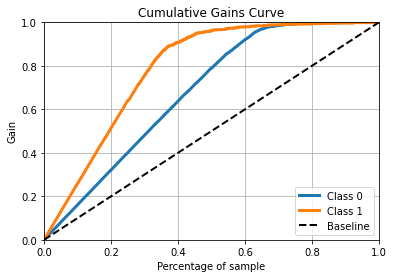

Analysis: 80% of first 846  instances rank-ordered by propensity are positive actuals in test dataset of size  2310
Percentage of rank-ordered data to take as leads:  36.62337662337662
LEADS:



,Actual,Predicted,Propensity
0,1,1,0.817726
1,1,1,0.817726
2,1,1,0.816569
3,1,1,0.816569
4,1,1,0.816569
...,...,...,...
842,0,0,0.492739
843,1,0,0.492339
844,1,0,0.491535
845,0,0,0.491308


In [ ]:
# Rank order propensities & display the first n records of the test dataset for which 80% are actual positives.
# Report the value of n as a percentage of the size of the test dataset

# First, compute the propensitiies of iunstances in the test dataset
clf_propensities = pd.DataFrame(clf.predict_proba(X_test_std))

# Create a dataframe showing actuals, predicted, and propensities
y_pred = pd.DataFrame(y_pred)
y_pred.reset_index(drop = True , inplace = True)
y_test.reset_index(drop = True , inplace = True)
results = pd.concat([y_test, y_pred, clf_propensities[1]], axis=1)
results.columns= ['Actual','Predicted','Propensity']

# Sort the instances in results by propsensity
results.sort_values(by=['Propensity'], inplace=True, ascending=False)
results.reset_index(drop = True , inplace = True)

# Plot gains chart
skplt.metrics.plot_cumulative_gain(y_test, clf_propensities)
plt.show()

# Find the top-rated instances in results such that the actual positive label for 'Converted' of those instances is greater than or equal to 80%
# We will assume the first lead has a positive actual
index = 2
n = 1
fraction = 1
while ((index < len(results)) & (fraction >= 0.8)):
  if results.loc[index,'Actual'] == 1:
    n=n+1
  fraction = n/index
  index = index + 1

print('Analysis: 80% of first',n,' instances rank-ordered by propensity are positive actuals in test dataset of size ',len(results))
print('Percentage of rank-ordered data to take as leads: ',100*n/len(results))
print('LEADS:\n')
results.loc[:n]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred))

[[1365   55]
 [ 112  778]]
Accuracy =  0.9277056277056277
Recall =  0.8741573033707866


#**TPOT**

In [ ]:
!pip install tpot

     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 192.9 MB 60 kB/s 
     |████████████████████████████████| 160 kB 44.2 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=e199108e2eae03d26a6427ea4aff049bc203d67ab810b4f67f779cc0913f4e22
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# Tree-based pipeline from TPOT: credits: http://automl.info/tpot/
# import the AutoMLpackage after installing tpot.
import tpot
# import other necessary packages.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTClassifier

In [ ]:
# Let TPOT build a model!
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='roc_auc', verbosity=3, random_state=1, n_jobs=-1)
clf.fit(X_train_SMOTE_std, y_train_SMOTE)
# evaluate best model
y_pred = clf.predict(X_test_std)
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Accuracy: {clf.score(X_test_std, y_test)}')

32 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

Skipped pipeline #16 due to time out. Continuing to the next pipeline.
Skipped pipeline #18 due to time out. Continuing to the next pipeline.
Skipped pipeline #45 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only dual=False, got dual=True.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Skipped pipeline #69 due to time out. Continuing to the next pipeline.
Skipped pipeline #79 due to time out. Continuing to the next pipeline.
Skipped pipeline #88 due to time out. Continuing to the next pipeline.
Skipped pipeline #105 due to time out. Continuing to the next pipeline.

Generation 1 - Current Pareto front scores:

-1	0.9782471807845996	RandomForestClassifier(input_matrix, RandomForestCl

In [ ]:
# Show the final model
clf.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GaussianNB())),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.3, min_samples_leaf=6,
                                      min_samples_split=13, random_state=1))])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy = ",accuracy_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred))

[[1349   71]
 [ 101  789]]
Accuracy =  0.9255411255411256
Recall =  0.8865168539325843


The top of the combined M4 and M7 leaderboard is as follows:

|**Regressor** |    AUC    |       Accuracy      | Confusion Matrix |
|:----------------------|:------------:|:--------------:|:--------------:|
|Auto-Sklearn Pipeline | 0.932 | 0.923 | $$\begin{bmatrix} 1365 & 55 \\ 101 & 788\\\end{bmatrix}$$ |
|TPOT Pipeline  | 0.918 | 0.925 | $$\begin{bmatrix} 1349 & 71 \\ 101 & 789\\\end{bmatrix}$$ |
|XGBoost (M4 notebook) | 0.879 | 0.887 | $$\begin{bmatrix} 1297 & 123 \\ 137 & 753\\\end{bmatrix}$$ |



#**Conclusions**
Auto-Sklearn appears to have the edge over TPOT, but there's not much in it. The Auto-Sklearn pipeline has an AUC of around 0.92 and an accuracy of around 0.92.